# ******FINDING THE FRAUDS******

*By Pratyush Kumar*

As the world moves toward a cashless, cloud-based reality, the banking sector is under greater threat than ever. The global cost of credit card fraud is expected to soar above $32 billion by 2020. While it’s a major problem, fraud only accounts for a minute fraction of the total number of transactions happening every day. This gives rise to another problem: imbalanced data.
In machine learning, fraud is viewed as a classification problem, and when you’re dealing with imbalanced data, it means the issue to be predicted is in the minority. As a result, the predictive model will often struggle to produce real business value from the data, and it can sometimes get it wrong.

Financial fraud still amounts for considerable amounts of money. Hackers and crooks around the world are always looking into new ways of committing financial fraud at each minute. Relying exclusively on rule-based, conventionally programmed systems for detecting financial fraud would not provide the appropriate time-to-market. This is where Machine Learning shines as a unique solution for this type of problem.
The main challenge when it comes to modeling fraud detection as a classification problem comes from the fact that in real world data, the majority of transactions is not fraudulent. Investment in technology for fraud detection has increased over the years so this shouldn’t be a surprise, but this brings us a problem: imbalanced data.

There are many ways of dealing with imbalanced data. Some of the approaches are:
1. Oversampling — SMOTE (Synthetic Minority Over-sampling Technique)
2. Undersampling — RandomUnderSampler
3. Combined Class Methods — SMOTE + ENN (SMOTE together with edited nearest-neighbours (ENN))

## *Importing all the packages*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.cm as cm #This module provides a large set of colormaps, functions for registering new colormaps and for getting a colormap by name, and a mixin class for adding color mapping functionality.
from random import seed,sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc,\
precision_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## *Importing Data set of Transactions* 

In [3]:
data=pd.read_csv("creditcard.csv")

## *Analysing the data frame*

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [20]:
no_of_payment_type= data['type'].nunique()
print(no_of_payment_type)

5


In [6]:
data.shape

(6362620, 11)

In [7]:
data.isnull().values.any()


False

Therefore there are no missing values in the data set. We would have to drop the rows if there were missing values.

In [8]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


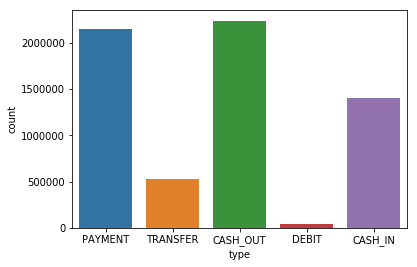

In [9]:
sns.countplot(x='type',data=data)

The most frequent transaction type is CASH_OUT followed by PAYMENT, CASH_IN and TRANSFER. DEBIT was the least used transaction type by the users.

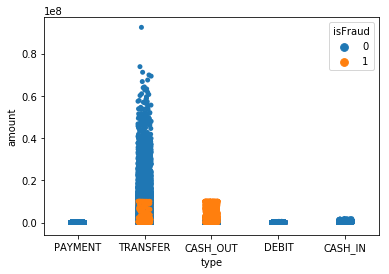

In [10]:
sns.stripplot(x='type',y='amount',data=data,hue='isFraud',jitter=True,size=5)

Segregating fraud transactions:

In [11]:
fraud=data[data["isFraud"]==1]

In [12]:
print("Fraud transactions by the type: \n",fraud.type.value_counts())

Fraud transactions by the type: 
 CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64


Therefore,according to the given data set of 6362620 entries fraudulent activities are found only in TRANSFER and CASH_OUT type transactions. 
Out of so many enteries (in millions) only a few 8000 are fraud. So clearly there is an imbalance of data.This is the reason that many fraud transactions not flagged as fraud. So due to imbalance of data, there is a huge probability that the future predictions are wrong. 

## *Balance error before and after transactions* 

In [15]:
wrong_orig_bal = sum(data["oldbalanceOrg"] - data["amount"] != data["newbalanceOrig"])
wrong_dest_bal = sum(data["newbalanceDest"] + data["amount"] != data["newbalanceDest"])
print("Percentage observations with balance errors in the account giving money: ", 100*(wrong_orig_bal/len(data)))
print("Percentage observations with balance errors in the account receiving money: ", 100*(wrong_dest_bal/len(data)))

Percentage observations with balance errors in the account giving money:  85.09068591240715
Percentage observations with balance errors in the account receiving money:  99.99974853126542


This suggests that in majority fraud trasactions, the desired amount was not received in the desination account although it was withdrawn from the source account.

## *Looking at transactions flagged as fraud*

In [16]:
# how many observations were flagged as Fraud?
flagged = data[data["isFlaggedFraud"] == 1]
flagged_correctly = sum(flagged["isFraud"] == 1)
flagged_wrongly = len(flagged) - flagged_correctly
total = flagged_correctly + flagged_wrongly
print(flagged_correctly," observations were flagged correctly and ", flagged_wrongly, \
      " observations were flagged wrongly for a total of ", total, " flagged observations.")

16  observations were flagged correctly and  0  observations were flagged wrongly for a total of  16  flagged observations.


## *Looking at transactions flagged as not fraud*

In [17]:
flaggedn = data[data["isFlaggedFraud"] == 0]
flaggedn_correctly = sum(flaggedn["isFraud"] == 0)
flaggedn_wrongly = len(flaggedn) - flaggedn_correctly
totaln = flaggedn_correctly + flaggedn_wrongly
print(flaggedn_correctly," observations were flagged correctly and ", flaggedn_wrongly, \
      " observations were flagged wrongly for a total of ", totaln, " flagged observations.")

6354407  observations were flagged correctly and  8197  observations were flagged wrongly for a total of  6362604  flagged observations.


Therefore 8197 were the total new fraud transactions which were not recognized as fraud.

## *Frequency of fraud transactions over time*

In [18]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


Text(0.5, 1.0, 'No of fraud transactions over time')

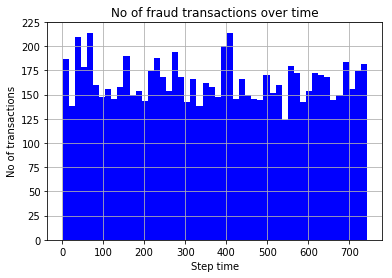

In [20]:
fraud.hist(column ="step",color="blue",bins=50)
plt.xlabel("Step time")
plt.ylabel("No of transactions")
plt.title("No of fraud transactions over time")

## *Model Building*

In [21]:
# Creating a dummy variable for the variable 'type' and dropping the first one.
dummy = pd.get_dummies(data['type'],prefix='type',drop_first=True)
#Adding the results to the master dataframe
data = pd.concat([data,dummy],axis=1)

In [22]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0,0,0,1,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0,0,0,1,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0,0,0,1,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0,0,0,1,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0,0,1,0,0


In [23]:
# Putting feature variable to X
X = data.drop(['isFraud','nameOrig','type','nameDest'],axis=1)

# Putting response variable to y
y = data['isFraud']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

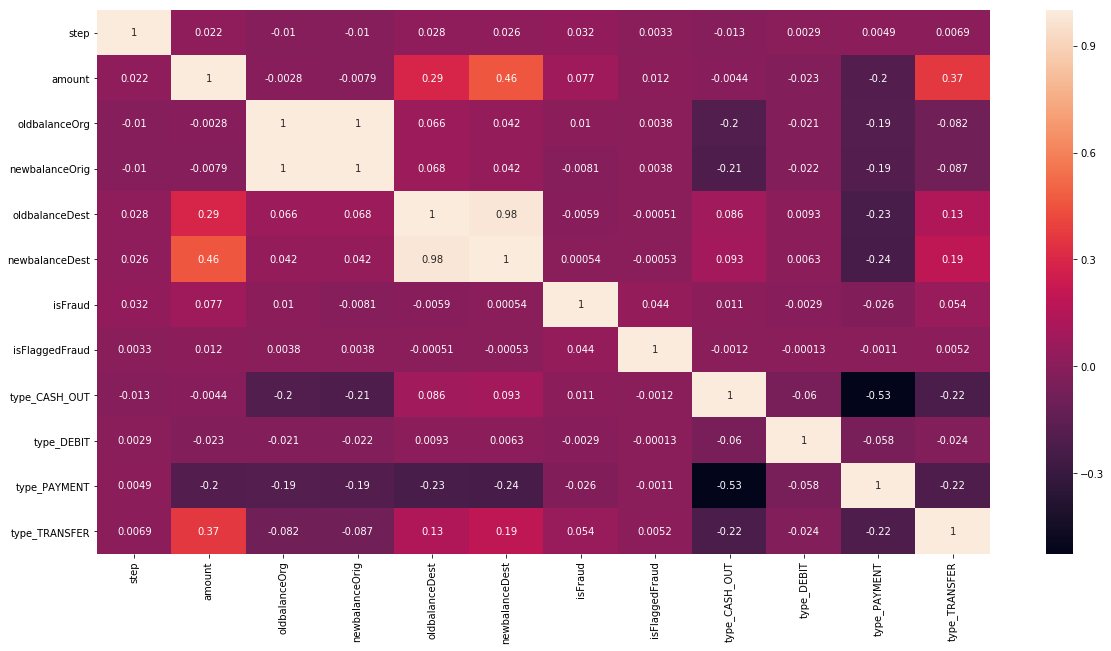

In [25]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(data.corr(),annot = True)

In [26]:
#Recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn import metrics
logsk = LogisticRegression()
rfe = RFE(logsk, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1]


In [27]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
lm_predict = logmodel.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(accuracy_score(lm_predict,y_test))
print(confusion_matrix(lm_predict,y_test))

0.9986991731917564
[[1906303    2478]
 [      5       0]]


Therefore 99.86% accuracy received using Logistic Regression. 